In [1]:
import ast


source_code = """
def calculate_roi(revenue, spend):
    profit = revenue - spend
    return (profit / spend) * 100
"""

tree = ast.parse(source_code)


def visual_tree_walk(node, level=0):
    indent = "  " * level
    print(f"{indent} {type(node).__name__}")

    for child in ast.iter_child_nodes(node):
        visual_tree_walk(child, level + 1)

print("--- Abstract Syntax Tree Visualization ---")
visual_tree_walk(tree)


--- Abstract Syntax Tree Visualization ---
 Module
   FunctionDef
     arguments
       arg
       arg
     Assign
       Name
         Store
       BinOp
         Name
           Load
         Sub
         Name
           Load
     Return
       BinOp
         BinOp
           Name
             Load
           Div
           Name
             Load
         Mult
         Constant


In [3]:
import ast
import graphviz
def generate_ast_graph(source):
    tree = ast.parse(source)

    dot = graphviz.Digraph(format='png', comment='AST Tree')

    def add_node(node, parent_id=None):

        node_id = str(id(node))
        label = type(node).__name__


        if isinstance(node, ast.Name):
            label += f" (Var: {node.id})"
        elif isinstance(node, ast.Constant):
            label += f" (Value: {node.value})"

        dot.node(node_id, label)


        if parent_id:
            dot.edge(parent_id, node_id)


        for child in ast.iter_child_nodes(node):
            add_node(child, node_id)

    add_node(tree)
    return dot


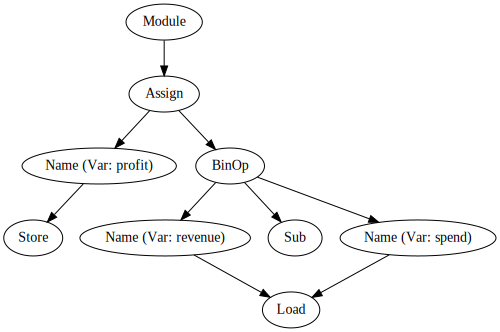

In [4]:

source_code = "profit = revenue - spend"


graph = generate_ast_graph(source_code)
graph

In [5]:
def calculate_complexity(source):
    tree = ast.parse(source)
    stats = {'Operations': 0, 'Variables': 0, 'Functions': 0}

    for node in ast.walk(tree):
        if isinstance(node, ast.BinOp):
            stats['Operations'] += 1
        elif isinstance(node, ast.Name) and isinstance(node.ctx, ast.Store):
            stats['Variables'] += 1
        elif isinstance(node, ast.FunctionDef):
            stats['Functions'] += 1

    return stats


code_to_check = """
def calculate_roi(revenue, spend):
    profit = revenue - spend
    return (profit / spend) * 100
"""
complexity = calculate_complexity(code_to_check)
print(f"--- Code Complexity Analysis ---")
print(f"Total Logic Operations: {complexity['Operations']}")
print(f"Unique Variables Defined: {complexity['Variables']}")
print(f"Functions Found: {complexity['Functions']}")

--- Code Complexity Analysis ---
Total Logic Operations: 3
Unique Variables Defined: 1
Functions Found: 1
